# Use Jupyter Notebook with an Ontop SPARQL endpoint

This tutorial shows how to use Python/Jupyter Notebook to interact with an Ontop SPARQL endpoint.

Assume that the endpoint is already set up and the URL is <http://localhost:8080/sparql>.


## SPARQLWrapper

You can use the SPARQLWrapper library <https://rdflib.github.io/sparqlwrapper/> to send SPARQL queries and get results. 
The following code gets the result as JSON documents and convert it to a Python dict object.  

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
sparql = SPARQLWrapper("http://localhost:8080/sparql")
q = """
PREFIX : <http://example.org/voc#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?lname ?title 
WHERE {

  ?attendee foaf:lastName ?lname ;
      :attends ?course .

  ?course :title ?title .
}
"""
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
print(results)

{'head': {'vars': ['lname', 'title']}, 'results': {'bindings': [{'lname': {'type': 'literal', 'value': 'Robards'}, 'title': {'type': 'literal', 'value': 'Research Methods'}}, {'lname': {'type': 'literal', 'value': 'Combs'}, 'title': {'type': 'literal', 'value': 'Operating Systems'}}, {'lname': {'type': 'literal', 'value': 'Doe'}, 'title': {'type': 'literal', 'value': 'Analysis'}}, {'lname': {'type': 'literal', 'value': 'Doe'}, 'title': {'type': 'literal', 'value': 'Linear Algebra'}}, {'lname': {'type': 'literal', 'value': 'Smith'}, 'title': {'type': 'literal', 'value': 'Operating Systems'}}, {'lname': {'type': 'literal', 'value': 'Hinkley'}, 'title': {'type': 'literal', 'value': 'Theory of Computing'}}, {'lname': {'type': 'literal', 'value': 'Hinkley'}, 'title': {'type': 'literal', 'value': 'Data Mining'}}, {'lname': {'type': 'literal', 'value': 'Robards'}, 'title': {'type': 'literal', 'value': 'Data Mining'}}, {'lname': {'type': 'literal', 'value': 'Combs'}, 'title': {'type': 'literal

## Pandas DataFrame

You might want to convert the SPARQL results to a pandas DataFrame for data analysis. 
The library `sparql-dataframe` <https://github.com/lawlesst/sparql-dataframe> is handy for this.

In [4]:
import sparql_dataframe

endpoint = "http://localhost:8080/sparql"

q = """
    PREFIX : <http://example.org/voc#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    
    SELECT ?lname ?course_title 
    WHERE {
    
      ?attendee foaf:lastName ?lname ;
          :attends ?course .
      ?course :title ?course_title .
    }
"""

df = sparql_dataframe.get(endpoint, q)

/usr/local/lib/python3.10/dist-packages/SPARQLWrapper/Wrapper.py:1215: RuntimeWarning: unknown response content type 'text/sparql-results+csv;charset=UTF-8' returning raw response...
  warnings.warn(


In [5]:
df.head()

,lname,course_title
0,Robards,Research Methods
1,Combs,Operating Systems
2,Doe,Analysis
3,Doe,Linear Algebra
4,Smith,Operating Systems


In [6]:
df.describe()

,lname,course_title
count,17,17
unique,8,11
top,Smith,Linear Algebra
freq,3,3


<Axes: >

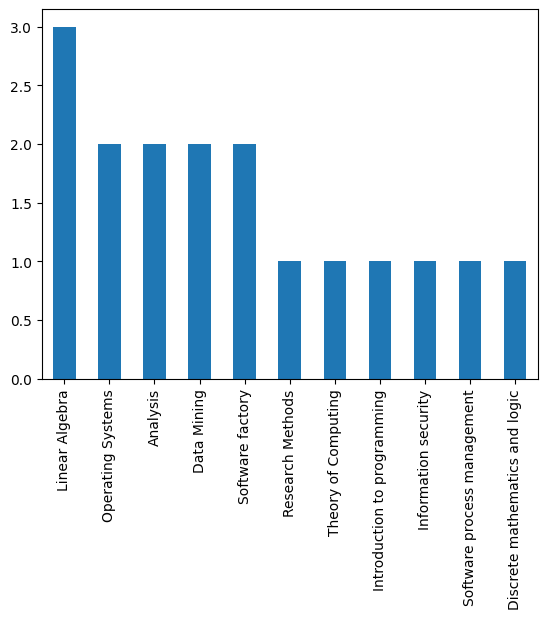

In [7]:
df['course_title'].value_counts().plot(kind='bar')